In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
n = 10
A, B = 1, 2
y_0 = np.sqrt(2)
z_0 = 3 * y_0 / 4
h = (B - A) / n

In [28]:
nodes = np.linspace(A, B, n + 1)
f1 = lambda x, y, z: z
f2 = lambda x, y, z: ( -(z * z / y) + 2 * (z / x))

In [29]:
def euler_method(f_1, f_2, start_values, left, right, n):
    step_size = (right - left) / n
    x_nodes = np.linspace(left, right, n)
    grid_axis = [
        [start_values[0]],
        [start_values[1]]
    ]
    for i in range(n):
        grid_axis[0].append(
            grid_axis[0][-1] + step_size * f_1(x_nodes[i], grid_axis[0][-1], grid_axis[1][-1])
        )
        grid_axis[1].append(
            grid_axis[1][-1] + step_size * f_2(x_nodes[i], grid_axis[0][-1], grid_axis[1][-1])
        )
    return grid_axis

In [30]:
grid = euler_method(f1, f2, [y_0, z_0], A, B, n)

In [31]:
print(*grid, sep='\n')

[np.float64(1.4142135623730951), np.float64(1.5202795795510773), np.float64(1.64015884547782), np.float64(1.7728543996382706), np.float64(1.9173317039538214), np.float64(2.072593759757583), np.float64(2.237722654135062), np.float64(2.4118970036222933), np.float64(2.5943943316392404), np.float64(2.784585210237429), np.float64(2.981923656249476)]
[np.float64(1.0606601717798214), np.float64(1.198792659267426), np.float64(1.3269555416045067), np.float64(1.4447730431555073), np.float64(1.5526205580376178), np.float64(1.6512889437747902), np.float64(1.741743494872315), np.float64(1.8249732801694705), np.float64(1.9019087859818873), np.float64(1.9733844601204689), np.float64(2.040127804568348)]


In [32]:
n = 10
grid = euler_method(f1, f2, [y_0, z_0], A, B, n)
nodes = np.linspace(A, B, n + 1)
x_axis_for_draw = nodes
y_axis_for_draw = grid[0]
y_axis1_for_draw = grid[1]

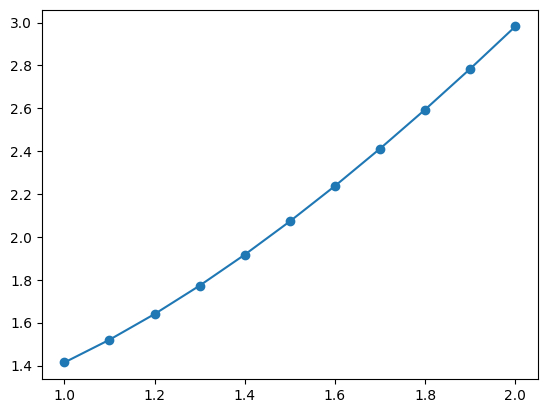

In [38]:
plt.plot(x_axis_for_draw, y_axis_for_draw, 'o-')
plt.show()

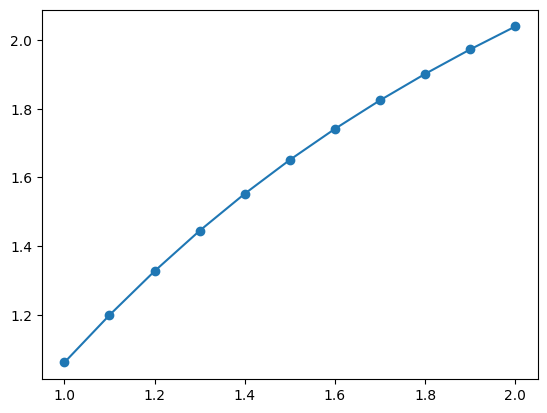

In [39]:
plt.plot(x_axis_for_draw, y_axis1_for_draw, 'o-')
plt.show()

x = 1.00, y = 1.414214
x = 1.10, y = 1.655635
x = 1.20, y = 1.931198
x = 1.30, y = 2.244318
x = 1.40, y = 2.598750
x = 1.50, y = 2.998625
x = 1.60, y = 3.448488
x = 1.70, y = 3.953336
x = 1.80, y = 4.518670
x = 1.90, y = 5.150537
x = 2.00, y = 5.855591


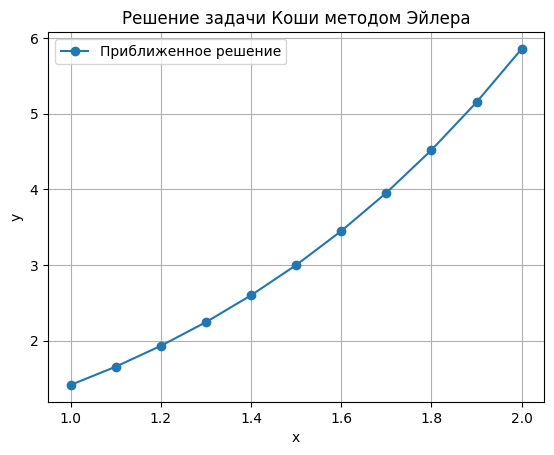

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, a, b, y0, h):
    """
    Решает задачу Коши y' = f(x, y) на отрезке [a, b] с начальным условием y(a) = y0
    с использованием явного метода Эйлера.

    Параметры:
    f - функция f(x, y)
    a, b - начало и конец отрезка
    y0 - начальное значение y(a)
    h - шаг

    Возвращает:
    x - массив значений x
    y - массив значений y
    """
    # Создаем массив для x
    x = np.arange(a, b + h, h)
    
    # Создаем массив для y и инициализируем начальное значение
    y = np.zeros(len(x))
    y[0] = y0
    
    # Применяем метод Эйлера
    for i in range(1, len(x)):
        y[i] = y[i-1] + h * f(x[i-1], y[i-1])
    
    return x, y

# Пример использования
def f(x, y):
    return x + y  # Пример функции f(x, y)

a = 1  # Начало отрезка
b = 2  # Конец отрезка
y0 = y_0  # Начальное условие y(a) = y0
h = 0.1  # Шаг

x, y = euler_method(f, a, b, y0, h)

# Вывод результатов
for i in range(len(x)):
    print(f"x = {x[i]:.2f}, y = {y[i]:.6f}")

# Построение графика
plt.plot(x, y, 'o-', label='Приближенное решение')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Решение задачи Коши методом Эйлера')
plt.legend()
plt.grid(True)
plt.show()


x = 0.00, y = 1.000000
x = 0.10, y = 1.122222
x = 0.20, y = 1.269136
x = 0.30, y = 1.443484
x = 0.40, y = 1.648316
x = 0.50, y = 1.887018
x = 0.60, y = 2.163353
x = 0.70, y = 2.481503
x = 0.80, y = 2.846115
x = 0.90, y = 3.262350
x = 1.00, y = 3.735944


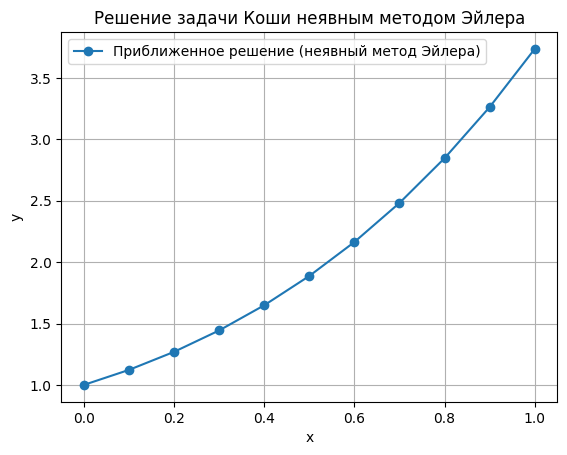

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve  # Для решения нелинейных уравнений

def implicit_euler_method(f, a, b, y0, h):
    """
    Решает задачу Коши y' = f(x, y) на отрезке [a, b] с начальным условием y(a) = y0
    с использованием неявного метода Эйлера.

    Параметры:
    f - функция f(x, y)
    a, b - начало и конец отрезка
    y0 - начальное значение y(a)
    h - шаг

    Возвращает:
    x - массив значений x
    y - массив значений y
    """
    # Создаем массив для x
    x = np.arange(a, b + h, h)
    
    # Создаем массив для y и инициализируем начальное значение
    y = np.zeros(len(x))
    y[0] = y0
    
    # Применяем неявный метод Эйлера
    for i in range(1, len(x)):
        # Определяем функцию для решения нелинейного уравнения
        def equation(y_next):
            return y_next - y[i-1] - h * f(x[i], y_next)
        
        # Решаем уравнение методом Ньютона
        y[i] = fsolve(equation, y[i-1])[0]
    
    return x, y

# Пример использования
def f(x, y):
    return x + y  # Пример функции f(x, y)

a = 0  # Начало отрезка
b = 1  # Конец отрезка
y0 = 1  # Начальное условие y(a) = y0
h = 0.1  # Шаг

x, y = implicit_euler_method(f, a, b, y0, h)

# Вывод результатов
for i in range(len(x)):
    print(f"x = {x[i]:.2f}, y = {y[i]:.6f}")

# Построение графика
plt.plot(x, y, 'o-', label='Приближенное решение (неявный метод Эйлера)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Решение задачи Коши неявным методом Эйлера')
plt.legend()
plt.grid(True)
plt.show()


x = 1.00, y = 1.414214, z = 1.060660
x = 1.05, y = 1.467247, z = 1.126951
x = 1.10, y = 1.523594, z = 1.191001
x = 1.15, y = 1.583144, z = 1.252723
x = 1.20, y = 1.645780, z = 1.312093
x = 1.25, y = 1.711385, z = 1.369131
x = 1.30, y = 1.779842, z = 1.423895
x = 1.35, y = 1.851036, z = 1.476469
x = 1.40, y = 1.924860, z = 1.526952
x = 1.45, y = 2.001207, z = 1.575455
x = 1.50, y = 2.079980, z = 1.622093
x = 1.55, y = 2.161085, z = 1.666982
x = 1.60, y = 2.244434, z = 1.710237
x = 1.65, y = 2.329946, z = 1.751968
x = 1.70, y = 2.417544, z = 1.792279
x = 1.75, y = 2.507158, z = 1.831271
x = 1.80, y = 2.598721, z = 1.869035
x = 1.85, y = 2.692173, z = 1.905659
x = 1.90, y = 2.787456, z = 1.941221
x = 1.95, y = 2.884517, z = 1.975796
x = 2.00, y = 2.983307, z = 2.009451


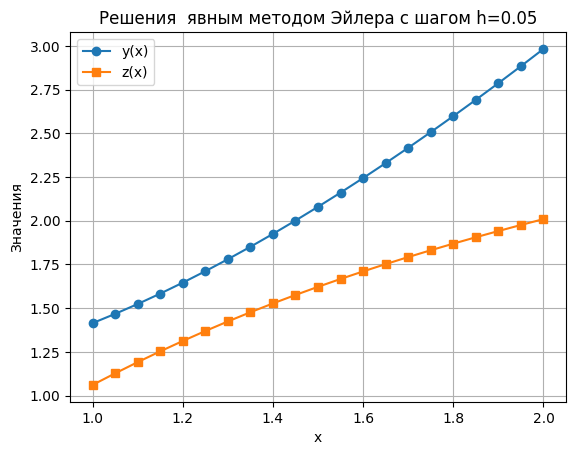

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def explicit_euler_system(f, g, a, b, y0, z0, h):
    """
    Решает систему задач Коши с использованием явного метода Эйлера.

    Параметры:
    f - функция для y': f(x, y, z)
    g - функция для z': g(x, y, z)
    a, b - начало и конец отрезка
    y0, z0 - начальные условия
    h - шаг

    Возвращает:
    x - массив значений x
    y - массив значений y
    z - массив значений z
    """
    x = np.arange(a, b + h, h)
    y = np.zeros(len(x))
    z = np.zeros(len(x))
    y[0] = y0
    z[0] = z0

    for i in range(1, len(x)):
        y[i] = y[i-1] + h * f(x[i-1], y[i-1], z[i-1])
        z[i] = z[i-1] + h * g(x[i-1], y[i-1], z[i-1])

    return x, y, z

# Определение функций системы
def f(x, y, z):
    return z  # y' = z

def g(x, y, z):
    return -(z**2 / y) + 2 * (z / x)  # z' = -(z^2 / y) + 2(z / x)

# Начальные условия
a = 1
b = 2
y0 = np.sqrt(2)
z0 = 3 * y0 / 4
h = 0.05

# Решение системы
x, y, z = explicit_euler_system(f, g, a, b, y0, z0, h)

# Вывод результатов
for i in range(len(x)):
    print(f"x = {x[i]:.2f}, y = {y[i]:.6f}, z = {z[i]:.6f}")

# Построение графиков
plt.plot(x, y, 'o-', label='y(x)')
plt.plot(x, z, 's-', label='z(x)')
plt.xlabel('x')
plt.ylabel('Значения')
plt.title('Решения  явным методом Эйлера с шагом h={}'.format(h))
plt.legend()
plt.grid(True)
plt.show()


x = 1.00, y = 1.414214, z = 1.060660
x = 1.05, y = 1.470452, z = 1.124763
x = 1.10, y = 1.529783, z = 1.186616
x = 1.15, y = 1.592093, z = 1.246209
x = 1.20, y = 1.657272, z = 1.303572
x = 1.25, y = 1.725210, z = 1.358765
x = 1.30, y = 1.795803, z = 1.411869
x = 1.35, y = 1.868952, z = 1.462979
x = 1.40, y = 1.944562, z = 1.512194
x = 1.45, y = 2.022543, z = 1.559622
x = 1.50, y = 2.102811, z = 1.605366
x = 1.55, y = 2.185288, z = 1.649532
x = 1.60, y = 2.269899, z = 1.692217
x = 1.65, y = 2.356575, z = 1.733520
x = 1.70, y = 2.445251, z = 1.773528
x = 1.75, y = 2.535868, z = 1.812328
x = 1.80, y = 2.628368, z = 1.849999
x = 1.85, y = 2.722698, z = 1.886615
x = 1.90, y = 2.818810, z = 1.922243
x = 1.95, y = 2.916658, z = 1.956948
x = 2.00, y = 3.016197, z = 1.990788


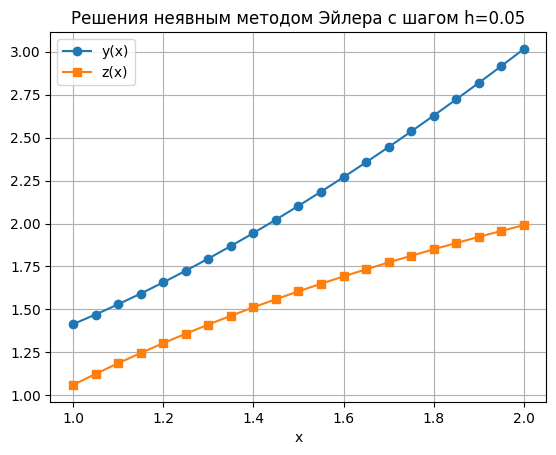

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def implicit_euler_system(f, g, a, b, y0, z0, h):
    """
    Решает систему задач Коши с использованием неявного метода Эйлера.

    Параметры:
    f - функция для y': f(x, y, z)
    g - функция для z': g(x, y, z)
    a, b - начало и конец отрезка
    y0, z0 - начальные условия
    h - шаг

    Возвращает:
    x - массив значений x
    y - массив значений y
    z - массив значений z
    """
    x = np.arange(a, b + h, h)
    y = np.zeros(len(x))
    z = np.zeros(len(x))
    y[0] = y0
    z[0] = z0

    for i in range(1, len(x)):
        # Определяем систему уравнений для y[i] и z[i]
        def equations(vars):
            y_next, z_next = vars
            eq1 = y_next - y[i-1] - h * f(x[i], y_next, z_next)
            eq2 = z_next - z[i-1] - h * g(x[i], y_next, z_next)
            return [eq1, eq2]

        # Решаем систему уравнений
        y[i], z[i] = fsolve(equations, [y[i-1], z[i-1]])

    return x, y, z

# Определение функций системы
def f(x, y, z):
    return z  # y' = z

def g(x, y, z):
    return -(z**2 / y) + 2 * (z / x)  # z' = -(z^2 / y) + 2(z / x)

# Начальные условия
a = 1
b = 2
y0 = np.sqrt(2)
z0 = 3 * y0 / 4
h = 0.05

# Решение системы
x, y, z = implicit_euler_system(f, g, a, b, y0, z0, h)

# Вывод результатов
for i in range(len(x)):
    print(f"x = {x[i]:.2f}, y = {y[i]:.6f}, z = {z[i]:.6f}")

# Построение графиков
plt.plot(x, y, 'o-', label='y(x)')
plt.plot(x, z, 's-', label='z(x)')
plt.xlabel('x')
plt.title('Решения неявным методом Эйлера с шагом h={}'.format(h))
plt.legend()
plt.grid(True)
plt.show()


Модифицированный метод Эйлера:
x: [1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65
 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]
y: [1.41421356 1.46890385 1.5267984  1.5877824  1.65174025 1.71855777
 1.78812383 1.86033141 1.93507842 2.01226807 2.09180913 2.1736159
 2.25760811 2.34371077 2.43185387 2.52197216 2.61400479 2.70789506
 2.80359007 2.90104051 3.00020031]
z: [1.06066017 1.12585193 1.18878428 1.24941351 1.30774598 1.36382594
 1.41772505 1.46953371 1.51935406 1.56729452 1.61346576 1.65797763
 1.70093703 1.74244655 1.78260347 1.82149933 1.8592197  1.89584416
 1.93144648 1.96609481 1.99985201]

Метод Хойна:
x: [1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65
 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]
y: [1.41421356 1.46890385 1.52679733 1.5877795  1.65173504 1.71854996
 1.78811328 1.8603181  1.9350624  2.01224944 2.091788   2.1735924
 2.25758238 2.34368294 2.43182407 2.52194049 2.61397134 2.7078599
 2.80355327 2.90100212 3.00016035]
z: [1.06066017 1.12

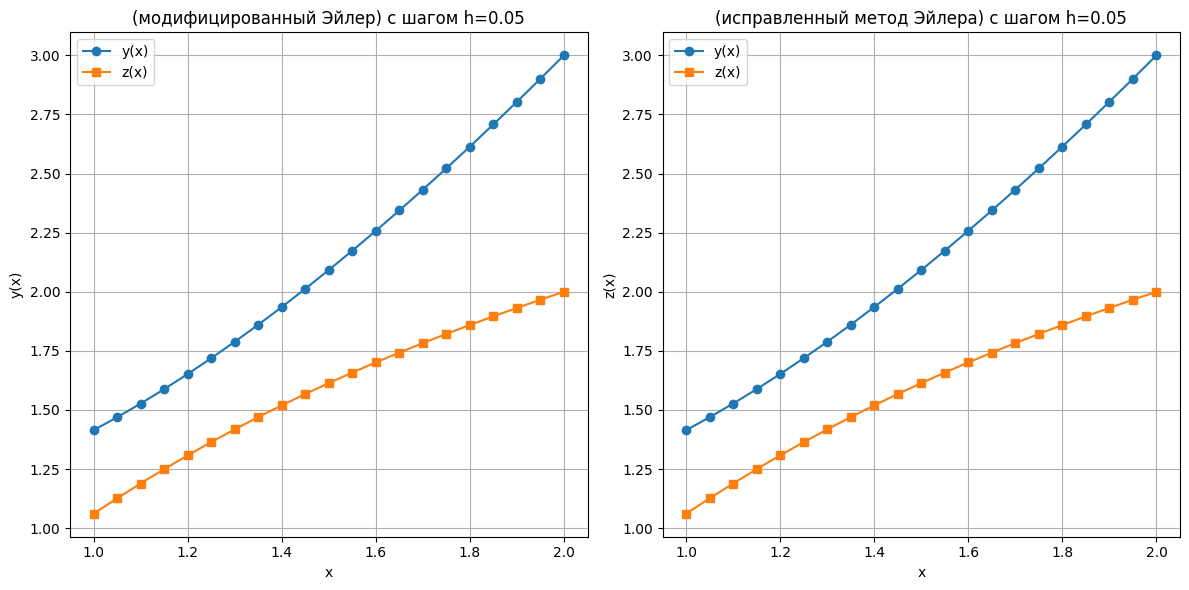

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Определение функций системы
def f(x, y, z):
    return z  # y' = z

def g(x, y, z):
    return -(z**2 / y) + 2 * (z / x)  # z' = -(z^2 / y) + 2(z / x)

# Модифицированный метод Эйлера
def modified_euler_system(f, g, a, b, y0, z0, h):
    """
    Решает систему задач Коши с использованием модифицированного метода Эйлера.

    Параметры:
    f - функция для y': f(x, y, z)
    g - функция для z': g(x, y, z)
    a, b - начало и конец отрезка
    y0, z0 - начальные условия
    h - шаг

    Возвращает:
    x - массив значений x
    y - массив значений y
    z - массив значений z
    """
    x = np.arange(a, b + h, h)
    y = np.zeros(len(x))
    z = np.zeros(len(x))
    y[0] = y0
    z[0] = z0

    for i in range(1, len(x)):
        # Прогноз
        y_pred = y[i-1] + h * f(x[i-1], y[i-1], z[i-1])
        z_pred = z[i-1] + h * g(x[i-1], y[i-1], z[i-1])

        # Коррекция
        y[i] = y[i-1] + h * f(x[i-1] + h/2, y[i-1] + h/2 * f(x[i-1], y[i-1], z[i-1]), z[i-1] + h/2 * g(x[i-1], y[i-1], z[i-1]))
        z[i] = z[i-1] + h * g(x[i-1] + h/2, y[i-1] + h/2 * f(x[i-1], y[i-1], z[i-1]), z[i-1] + h/2 * g(x[i-1], y[i-1], z[i-1]))

    return x, y, z

# Исправленный метод Эйлера (метод Хойна)
def heun_system(f, g, a, b, y0, z0, h):
    """
    Решает систему задач Коши с использованием исправленного метода Эйлера (метода Хойна).

    Параметры:
    f - функция для y': f(x, y, z)
    g - функция для z': g(x, y, z)
    a, b - начало и конец отрезка
    y0, z0 - начальные условия
    h - шаг

    Возвращает:
    x - массив значений x
    y - массив значений y
    z - массив значений z
    """
    x = np.arange(a, b + h, h)
    y = np.zeros(len(x))
    z = np.zeros(len(x))
    y[0] = y0
    z[0] = z0

    for i in range(1, len(x)):
        # Прогноз
        y_pred = y[i-1] + h * f(x[i-1], y[i-1], z[i-1])
        z_pred = z[i-1] + h * g(x[i-1], y[i-1], z[i-1])

        # Коррекция
        y[i] = y[i-1] + h * 0.5 * (f(x[i-1], y[i-1], z[i-1]) + f(x[i], y_pred, z_pred))
        z[i] = z[i-1] + h * 0.5 * (g(x[i-1], y[i-1], z[i-1]) + g(x[i], y_pred, z_pred))

    return x, y, z

# Начальные условия
a = 1
b = 2
y0 = np.sqrt(2)
z0 = 3 * y0 / 4
h = 0.05

# Решение системы модифицированным методом Эйлера
x_mod, y_mod, z_mod = modified_euler_system(f, g, a, b, y0, z0, h)

# Решение системы методом Хойна
x_heun, y_heun, z_heun = heun_system(f, g, a, b, y0, z0, h)

# Вывод результатов
# Вывод результатов
print("Модифицированный метод Эйлера:")
print("x:", x_mod)
print("y:", y_mod)
print("z:", z_mod)

print("\nМетод Хойна:")
print("x:", x_heun)
print("y:", y_heun)
print("z:", z_heun)

# Построение графиков
plt.figure(figsize=(12, 6))

# Графики для y(x)
plt.subplot(1, 2, 1)
plt.plot(x_mod, y_mod, 'o-', label='y(x)')
plt.plot(x_heun, z_mod, 's-', label='z(x)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(f'(модифицированный Эйлер) c шагом h={h}')
plt.legend()
plt.grid()

# Графики для z(x)
plt.subplot(1, 2, 2)
plt.plot(x_mod, y_heun, 'o-', label='y(x)')
plt.plot(x_heun, z_heun, 's-', label='z(x)')
plt.xlabel('x')
plt.ylabel('z(x)')
plt.title(f'(исправленный метод Эйлера) c шагом h={h}')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()